In [1]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

import os, shutil

import tensorflow as tf

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

2022-03-02 13:52:15.245657: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0


In [2]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    tf.config.experimental.set_memory_growth(gpus[0], True)
  except RuntimeError as e:
    print(e)

2022-03-02 13:52:17.458771: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-03-02 13:52:17.459787: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2022-03-02 13:52:17.484864: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-02 13:52:17.485416: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:00:1e.0 name: Tesla T4 computeCapability: 7.5
coreClock: 1.59GHz coreCount: 40 deviceMemorySize: 14.75GiB deviceMemoryBandwidth: 298.08GiB/s
2022-03-02 13:52:17.485437: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2022-03-02 13:52:17.488548: I tensorflow/stream_executor/platform/default/dso_loade

In [3]:
# 한글설정
from matplotlib import font_manager, rc
font_path = '/usr/share/fonts/truetype/NanumGothic.ttf'
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [ ]:
!pip install mxnet
!pip install gluonnlp pandas tqdm
!pip install sentencepiece
!pip install transformers==3.0.2
!pip install torch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.3/47.3 MB 47.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 344.5/344.5 KB 26.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached Cython-0.29.28-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.9 MB)
  Created wheel for gluonnlp: filename=gluonnlp-0.10.0-cp37-cp37m-linux_x86_64.whl size=595888 sha256=ba9cebaf733cc2f5cebf1abd37a69a1a2ac4e103898efd601af4450f551384d4
  Stored in directory: /home/lab09/.cache/pip/wheels/be/b4/06/7f3fdfaf707e6b5e98b79c041e023acffbe395d78a527eae00
Successfully built gluonnlp
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 44.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 769.0/769.0 KB 48.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 895.2/895.2 KB 85.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 107.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
!pwd

/home/lab09


In [ ]:
cd data

/home/lab09/data


In [ ]:
!pip install git+https://git@github.com/SKTBrain/KoBERT.git@master

  Cloning https://****@github.com/SKTBrain/KoBERT.git (to revision master) to /tmp/pip-req-build-3djion6r
  Running command git clone --filter=blob:none --quiet 'https://****@github.com/SKTBrain/KoBERT.git' /tmp/pip-req-build-3djion6r
  Resolved https://****@github.com/SKTBrain/KoBERT.git to commit a82d428c26988ff40c03309038dba813fb83b92e
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.2/132.2 KB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 88.7 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 103.2 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 101.7 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 KB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 KB 17.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 106.9 MB/s eta 0:00:0000:0100:01
  Created wheel for kobert

In [4]:
import torch
from torch import nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import gluonnlp as nlp
from tqdm import tqdm, tqdm_notebook

In [5]:
#kobert
from kobert.utils import get_tokenizer
from kobert.pytorch_kobert import get_pytorch_kobert_model

#transformers
from transformers import AdamW
from transformers.optimization import get_cosine_schedule_with_warmup

In [6]:
#BERT 모델, Vocabulary 불러오기
bertmodel, vocab = get_pytorch_kobert_model()

using cached model. /home/lab12/.cache/kobert_v1.zip
using cached model. /home/lab12/.cache/kobert_news_wiki_ko_cased-1087f8699e.spiece


In [7]:
class BERTDataset(Dataset):
    def __init__(self, dataset, sent_idx, label_idx, bert_tokenizer, max_len,
                 pad, pair):
        transform = nlp.data.BERTSentenceTransform(
            bert_tokenizer, max_seq_length=max_len, pad=pad, pair=pair)

        self.sentences = [transform([i[sent_idx]]) for i in dataset]
        self.labels = [np.int32(i[label_idx]) for i in dataset]

    def __getitem__(self, i):
        return (self.sentences[i] + (self.labels[i], ))

    def __len__(self):
        return (len(self.labels))

In [8]:
!pwd

/home/lab12


In [9]:
cd data

/home/lab12/data


In [10]:
import pickle

In [74]:
with open('./nsmc_train_preprocess.pk', 'rb') as f:
    train=pickle.load(f)
with open('./nsmc_test_preprocess.pk', 'rb') as f:
    test=pickle.load(f)

In [75]:
train[:3]

[[['인천', '핀란드', '항공기', '결항', '휴가', '여행객', '분통'], 4],
 [['실리콘밸리', '넘어서다', '구글', '15조원', '미국', '전역', '거점'], 4],
 [['이란', '외무', '긴장', '완화', '해결', '미국', '경제', '전쟁'], 4]]

In [76]:
#train & test 데이터로 나누기
from sklearn.model_selection import train_test_split
                                                         
train, validation = train_test_split(train, train_size=0.7, random_state=123)

In [77]:
print(len(train))
print(len(validation))

31957
13697


In [78]:
x_train = [ line[0] for line in train if len(line[0]) > 1]
y_train = np.array([ int(line[1]) for line in train if len(line[0]) > 1])

x_validation = [ line[0] for line in validation if len(line[0]) > 1]
y_validation = np.array([ int(line[1]) for line in validation if len(line[0]) > 1])

In [79]:
y_validation

array([6, 4, 2, ..., 3, 5, 6])

In [80]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [81]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_train)
len(tokenizer.word_index)

23379

In [82]:
total_cnt = len(tokenizer.word_index)
total_freq = 0

rare_cnt = 0
rare_freq = 0
for key, value in tokenizer.word_counts.items():
    total_freq += value
    
    if value < 3:
        rare_cnt += 1
        rare_freq += value

In [83]:
print(f'전체 단어 집합: {total_cnt}')
print(f'2번 이하로 사용된 단어의 집합: {rare_cnt}')
print(f'2번 이하로 사용된 단어의 집합의 비율: {rare_cnt / total_cnt * 100}')
print(f'2번 이하로 사용된 단어의 출현 비율: {rare_freq / total_freq * 100}')

전체 단어 집합: 23379
2번 이하로 사용된 단어의 집합: 13446
2번 이하로 사용된 단어의 집합의 비율: 57.513152829462335
2번 이하로 사용된 단어의 출현 비율: 8.179138300221812


In [84]:
max_words = total_cnt - rare_cnt + 1
max_words

9934

In [85]:
tokenizer = Tokenizer(max_words)
tokenizer.fit_on_texts(x_train)
x_train = tokenizer.texts_to_sequences(x_train)
x_validation = tokenizer.texts_to_sequences(x_validation)

In [86]:
print(f'최대 길이: {max(len(news) for news in x_train)}')
print(f'평균 길이: {sum(len(news) for news in x_train)/len(x_train)}')

최대 길이: 21
평균 길이: 5.998870800790439


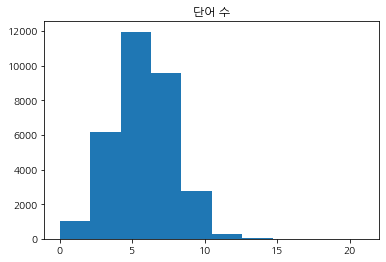

In [87]:
plt.hist([len(news) for news in x_train])
plt.title('단어 수')
plt.show()

In [88]:
# 최대 길이에 맞춰서 패딩을 삽입
maxLen = 21
x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train, maxlen = maxLen)
y_train = np.asarray(y_train)

x_validation = tf.keras.preprocessing.sequence.pad_sequences(x_validation, maxlen = maxLen)
y_validation = np.asarray(y_validation)

In [89]:
import tensorflow.keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Embedding, LSTM, Dropout, Bidirectional
from sklearn.model_selection import StratifiedKFold

In [90]:
# 종속변수 데이터 전처리
y_train = to_categorical(y_train) # Y_train 에 원-핫 인코딩
print(y_train)
print(y_train.shape)

[[0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
(31881, 7)


In [91]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Embedding, Dropout, Conv1D, GlobalMaxPooling1D, Dense, Input, Flatten, Concatenate
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model

# embedding_dim = 100
# dropout_ratio = (0.5, 0.8)
# num_filters = 128
# hidden_units = 128

In [117]:
embedding_dim = 100
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Embedding(max_words, embedding_dim, input_length=maxLen))
model.add(tf.keras.layers.SimpleRNN(units = 64, return_sequences = True))
model.add(tf.keras.layers.SimpleRNN(units = 64, return_sequences = True))
model.add(tf.keras.layers.SimpleRNN(units = 64))
model.add(tf.keras.layers.Dense(7, activation='sigmoid'))

In [118]:
model.compile(
  loss='binary_crossentropy',
  metrics = ['acc'],
  optimizer = 'adam'
)

In [119]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_12 (Embedding)     (None, 21, 100)           993400    
_________________________________________________________________
simple_rnn_6 (SimpleRNN)     (None, 21, 64)            10560     
_________________________________________________________________
simple_rnn_7 (SimpleRNN)     (None, 21, 64)            8256      
_________________________________________________________________
simple_rnn_8 (SimpleRNN)     (None, 64)                8256      
_________________________________________________________________
dense_19 (Dense)             (None, 7)                 455       
Total params: 1,020,927
Trainable params: 1,020,927
Non-trainable params: 0
_________________________________________________________________


In [120]:
hist = model.fit(x_train, y_train, epochs=30, batch_size=256, validation_split = 0.2)

Epoch 1/30
100/100 [==============================] - 9s 65ms/step - loss: 0.4339 - acc: 0.2475 - val_loss: 0.2523 - val_acc: 0.7260
Epoch 2/30
100/100 [==============================] - 4s 41ms/step - loss: 0.1923 - acc: 0.8144 - val_loss: 0.1571 - val_acc: 0.8084
Epoch 3/30
100/100 [==============================] - 4s 42ms/step - loss: 0.0975 - acc: 0.9085 - val_loss: 0.1469 - val_acc: 0.8186
Epoch 4/30
100/100 [==============================] - 4s 41ms/step - loss: 0.0643 - acc: 0.9403 - val_loss: 0.1546 - val_acc: 0.8095
Epoch 5/30
100/100 [==============================] - 6s 57ms/step - loss: 0.0444 - acc: 0.9618 - val_loss: 0.1660 - val_acc: 0.8057
Epoch 6/30
100/100 [==============================] - 6s 64ms/step - loss: 0.0298 - acc: 0.9778 - val_loss: 0.1847 - val_acc: 0.7902
Epoch 7/30
100/100 [==============================] - 6s 64ms/step - loss: 0.0215 - acc: 0.9845 - val_loss: 0.1920 - val_acc: 0.7922
Epoch 8/30
100/100 [==============================] - 6s 63ms/step - 

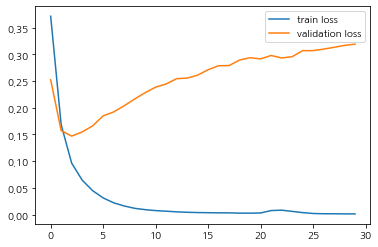

In [121]:
plt.plot(hist.history['loss'], label='train loss')
plt.plot(hist.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

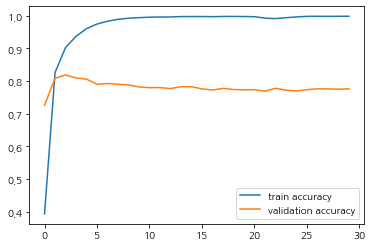

In [122]:
plt.plot(hist.history['acc'], label='train accuracy')
plt.plot(hist.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

wow,,,

In [119]:
pred = model.predict(x_validation)
t= []
for i in range(len(pred)):
    t.append(np.argmax(pred[i]))

In [120]:
t[:20]

[6, 2, 2, 6, 1, 5, 3, 5, 5, 4, 3, 3, 1, 5, 2, 5, 5, 6, 0, 2]

In [121]:
y_validation[:20]

array([6, 4, 2, 6, 1, 5, 3, 5, 5, 4, 3, 3, 1, 5, 2, 5, 5, 6, 0, 2])

In [122]:
print(len(y_validation))
print(sum(t == y_validation))

13664
10880


In [134]:
with open('./nsmc_test_preprocess.pk', 'rb') as f:
    test=pickle.load(f)

In [135]:
test

[['유튜브', '크리에이터', '지원', '공간', '운영'],
 ['어버이날', '맑다', '흐려지다', '남부', '지방', '옅다', '황사'],
 ['국가', '연구개발', '평가', '논문', '건수', '반영'],
 ['김명자', '신임', '과총', '회장', '원로', '과학자', '지혜'],
 ['회색', '인간', '작가', '동식', '양심', '고백', '소설'],
 ['야외', '생방송', '전용'],
 ['월드컵', '태극전사', '초기', '레오', '입성'],
 ['미세먼지', '출근길'],
 ['왓츠앱', '세금', '성나다', '레바논', '민심', '총리', '사퇴'],
 ['베트남', '경제', '성장', '지속', '국내총생산', '성장'],
 ['그리스', '국전', '참전', '기념', '참전용사', '한반도', '평화', '기원'],
 ['정진석', '이정현', '현실', '냉정하다', '물러나다'],
 ['미국', '베네수엘라', '구호', '반입', '촉구', '안보리', '결의', '추진'],
 ['황재균', '쐐기', '삼성', '고춧가루'],
 ['정상회담', '문재인', '대통령', '취임', '남북관계', '주요', '일지'],
 ['LGU', '영업', '마케팅', '비용', '감소'],
 ['박원순', '시장', '아부다비', '루브르', '박물관', '방문'],
 ['방심위', '강릉', '고성', '산불', '현장', '보도', '케이비에스', '관계자', '징계'],
 ['파키스탄', '경제', '카타르', '30억', '달러', '투자', '유치'],
 ['일본', '예산', '팽창', '재정', '건전성', '장기', '채무', '국내총생산'],
 ['칠레', '민중', '가수', '살해', '미국', '도피', '군인', '법정'],
 ['일본', '온라인', '중국인', '비자', '신청'],
 ['동부', '마비', '악성', '파일', '국내', '발견'],
 ['발간', '나노', 

In [136]:
tokenizer = Tokenizer(max_words)
tokenizer.fit_on_texts(test)
test = tokenizer.texts_to_sequences(test)

In [137]:
maxLen = 21
test = tf.keras.preprocessing.sequence.pad_sequences(test, maxlen = maxLen)

In [138]:
test

array([[   0,    0,    0, ...,   31,  782,  168],
       [   0,    0,    0, ...,  912, 3302, 1884],
       [   0,    0,    0, ...,  975, 3303, 1477],
       ...,
       [   0,    0,    0, ...,   93, 1027,   24],
       [   0,    0,    0, ..., 1136, 4287, 1655],
       [   0,    0,    0, ...,  175,  897,   31]], dtype=int32)

In [139]:
pred = model.predict(test)
t= []
for i in range(len(pred)):
    t.append(np.argmax(pred[i]))

In [140]:
t[:20]

[4, 3, 4, 3, 3, 2, 3, 2, 2, 2, 3, 4, 4, 3, 3, 2, 2, 3, 2, 2]

In [141]:
test_data = pd.read_csv('/home/lab12/data/test_data.csv')
topic = pd.read_csv('/home/lab12/data/topic_dict.csv')

In [142]:
test_data['topic_idx'] = t
test_data['topic'] = np.where(test_data.topic_idx == 0, 'IT과학',
                             np.where(test_data.topic_idx == 1, '경제',
                                     np.where(test_data.topic_idx == 2, '사회',
                                             np.where(test_data.topic_idx == 3, '생활문화',
                                                     np.where(test_data.topic_idx == 4, '세계',
                                                             np.where(test_data.topic_idx == 5, '스포츠', '정치'))))))

In [143]:
test_data

,index,title,topic_idx,topic
0,45654,유튜브 내달 2일까지 크리에이터 지원 공간 운영,4,세계
1,45655,어버이날 맑다가 흐려져…남부지방 옅은 황사,3,생활문화
2,45656,내년부터 국가RD 평가 때 논문건수는 반영 않는다,4,세계
3,45657,김명자 신임 과총 회장 원로와 젊은 과학자 지혜 모을 것,3,생활문화
4,45658,회색인간 작가 김동식 양심고백 등 새 소설집 2권 출간,3,생활문화
...,...,...,...,...
9126,54780,인천 오후 3시35분 대설주의보…눈 3.1cm 쌓여,2,사회
9127,54781,노래방에서 지인 성추행 외교부 사무관 불구속 입건종합,3,생활문화
9128,54782,40년 전 부마항쟁 부산 시위 사진 2점 최초 공개,2,사회
9129,54783,게시판 아리랑TV 아프리카개발은행 총회 개회식 생중계,3,생활문화


In [144]:
test_data[test_data.topic_idx == 3]

,index,title,topic_idx,topic
1,45655,어버이날 맑다가 흐려져…남부지방 옅은 황사,3,생활문화
3,45657,김명자 신임 과총 회장 원로와 젊은 과학자 지혜 모을 것,3,생활문화
4,45658,회색인간 작가 김동식 양심고백 등 새 소설집 2권 출간,3,생활문화
6,45660,월드컵 태극전사 16강 전초기지 레오강 입성종합,3,생활문화
10,45664,그리스서 한국전 참전 기념식…참전용사 한반도 평화 기원,3,생활문화
...,...,...,...,...
9114,54768,KBS이사회 고대영 사장 해임제청…KBS사태 일지,3,생활문화
9123,54777,세종시 공무원 투기 부추겨…공짜 통근버스 없애라,3,생활문화
9125,54779,실명제후 차명계좌도 과징금…이건희 다른계좌 영향권 드나종합2보,3,생활문화
9127,54781,노래방에서 지인 성추행 외교부 사무관 불구속 입건종합,3,생활문화


In [45]:
!pip install catboost

In [46]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets

# ML
from sklearn.svm import SVC, SVR
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

# ensemble(bagging)
from sklearn.ensemble import ( 
  BaggingClassifier, BaggingRegressor, RandomForestClassifier, RandomForestRegressor
)

#ensemble(boosting)
import xgboost as xgb
import lightgbm as lgb
import catboost as cb

#stacking
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingClassifier, StackingRegressor

# 평가
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, roc_curve, classification_report

# 교차검증
from sklearn.model_selection import (
  KFold, StratifiedKFold, RepeatedStratifiedKFold, cross_val_score, GridSearchCV, train_test_split
)

# Feature Selection
from sklearn.feature_selection import RFE, RFECV

# 시각화(SVM은 회귀계수가 나오지 않습니다.)
import eli5
from eli5.sklearn import PermutationImportance
import shap

# 트리 시각화
import graphviz

In [218]:
model = tf.keras.models.Sequential()
model.add( tf.keras.layers.Embedding( max_words, 128, input_length=maxLen ))
model.add( tf.keras.layers.Conv1D(32, 7, activation='relu'))
model.add( tf.keras.layers.MaxPool1D(5))
model.add( tf.keras.layers.Conv1D(32, 7, activation='relu'))
model.add( tf.keras.layers.GlobalMaxPool1D())
model.add( tf.keras.layers.Dense(7, activation='sigmoid'))

model.compile(
  loss='binary_crossentropy',
  metrics = ['acc'],
  optimizer = tf.keras.optimizers.RMSprop(lr=0.0001)
)

ValueError: Negative dimension size caused by subtracting 7 from 3 for '{{node conv1d_11/conv1d}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](conv1d_11/conv1d/ExpandDims, conv1d_11/conv1d/ExpandDims_1)' with input shapes: [?,1,3,32], [1,7,32,32].

In [110]:
hist = model.fit(x_train, y_train, epochs=50, batch_size=256, validation_split = 0.2)

Epoch 1/50


ValueError: in user code:

    /home/ubuntu/anaconda3/envs/tensorflow_lab12/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:805 train_function  *
        return step_function(self, iterator)
    /home/ubuntu/anaconda3/envs/tensorflow_lab12/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:795 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /home/ubuntu/anaconda3/envs/tensorflow_lab12/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /home/ubuntu/anaconda3/envs/tensorflow_lab12/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /home/ubuntu/anaconda3/envs/tensorflow_lab12/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    /home/ubuntu/anaconda3/envs/tensorflow_lab12/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:788 run_step  **
        outputs = model.train_step(data)
    /home/ubuntu/anaconda3/envs/tensorflow_lab12/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:754 train_step
        y_pred = self(x, training=True)
    /home/ubuntu/anaconda3/envs/tensorflow_lab12/lib/python3.7/site-packages/tensorflow/python/keras/engine/base_layer.py:1012 __call__
        outputs = call_fn(inputs, *args, **kwargs)
    /home/ubuntu/anaconda3/envs/tensorflow_lab12/lib/python3.7/site-packages/tensorflow/python/keras/engine/sequential.py:375 call
        return super(Sequential, self).call(inputs, training=training, mask=mask)
    /home/ubuntu/anaconda3/envs/tensorflow_lab12/lib/python3.7/site-packages/tensorflow/python/keras/engine/functional.py:425 call
        inputs, training=training, mask=mask)
    /home/ubuntu/anaconda3/envs/tensorflow_lab12/lib/python3.7/site-packages/tensorflow/python/keras/engine/functional.py:560 _run_internal_graph
        outputs = node.layer(*args, **kwargs)
    /home/ubuntu/anaconda3/envs/tensorflow_lab12/lib/python3.7/site-packages/tensorflow/python/keras/engine/base_layer.py:1012 __call__
        outputs = call_fn(inputs, *args, **kwargs)
    /home/ubuntu/anaconda3/envs/tensorflow_lab12/lib/python3.7/site-packages/tensorflow/python/keras/layers/convolutional.py:248 call
        outputs = self._convolution_op(inputs, self.kernel)
    /home/ubuntu/anaconda3/envs/tensorflow_lab12/lib/python3.7/site-packages/tensorflow/python/util/dispatch.py:201 wrapper
        return target(*args, **kwargs)
    /home/ubuntu/anaconda3/envs/tensorflow_lab12/lib/python3.7/site-packages/tensorflow/python/ops/nn_ops.py:1020 convolution_v2
        name=name)
    /home/ubuntu/anaconda3/envs/tensorflow_lab12/lib/python3.7/site-packages/tensorflow/python/ops/nn_ops.py:1150 convolution_internal
        name=name)
    /home/ubuntu/anaconda3/envs/tensorflow_lab12/lib/python3.7/site-packages/tensorflow/python/util/dispatch.py:201 wrapper
        return target(*args, **kwargs)
    /home/ubuntu/anaconda3/envs/tensorflow_lab12/lib/python3.7/site-packages/tensorflow/python/util/deprecation.py:605 new_func
        return func(*args, **kwargs)
    /home/ubuntu/anaconda3/envs/tensorflow_lab12/lib/python3.7/site-packages/tensorflow/python/util/deprecation.py:605 new_func
        return func(*args, **kwargs)
    /home/ubuntu/anaconda3/envs/tensorflow_lab12/lib/python3.7/site-packages/tensorflow/python/ops/nn_ops.py:1893 conv1d
        name=name)
    /home/ubuntu/anaconda3/envs/tensorflow_lab12/lib/python3.7/site-packages/tensorflow/python/ops/gen_nn_ops.py:973 conv2d
        data_format=data_format, dilations=dilations, name=name)
    /home/ubuntu/anaconda3/envs/tensorflow_lab12/lib/python3.7/site-packages/tensorflow/python/framework/op_def_library.py:750 _apply_op_helper
        attrs=attr_protos, op_def=op_def)
    /home/ubuntu/anaconda3/envs/tensorflow_lab12/lib/python3.7/site-packages/tensorflow/python/framework/func_graph.py:592 _create_op_internal
        compute_device)
    /home/ubuntu/anaconda3/envs/tensorflow_lab12/lib/python3.7/site-packages/tensorflow/python/framework/ops.py:3536 _create_op_internal
        op_def=op_def)
    /home/ubuntu/anaconda3/envs/tensorflow_lab12/lib/python3.7/site-packages/tensorflow/python/framework/ops.py:2016 __init__
        control_input_ops, op_def)
    /home/ubuntu/anaconda3/envs/tensorflow_lab12/lib/python3.7/site-packages/tensorflow/python/framework/ops.py:1856 _create_c_op
        raise ValueError(str(e))

    ValueError: Negative dimension size caused by subtracting 7 from 2 for '{{node sequential_10/conv1d_17/conv1d}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](sequential_10/conv1d_17/conv1d/ExpandDims, sequential_10/conv1d_17/conv1d/ExpandDims_1)' with input shapes: [?,1,2,32], [1,7,32,32].


In [219]:
embedding_dim = 100
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Embedding(max_words, embedding_dim, input_length=maxLen))
model.add( tf.keras.layers.Dropout(0.5) )
model.add(tf.keras.layers.GRU(units = 64, return_sequences = True))
model.add(tf.keras.layers.GRU(units = 64, return_sequences = True))
model.add(tf.keras.layers.GRU(units = 64))
model.add(tf.keras.layers.Dense(7, activation='softmax'))

In [220]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy', 
    metrics=['acc'])

In [221]:
history = model.fit(x_train, y_train, epochs=30, batch_size=256, validation_split=0.2)

Epoch 1/30
100/100 [==============================] - 6s 22ms/step - loss: 0.4932 - acc: 0.1603 - val_loss: 0.3443 - val_acc: 0.4101
Epoch 2/30
100/100 [==============================] - 1s 15ms/step - loss: 0.2973 - acc: 0.5199 - val_loss: 0.1886 - val_acc: 0.7607
Epoch 3/30
100/100 [==============================] - 2s 16ms/step - loss: 0.1559 - acc: 0.8154 - val_loss: 0.1441 - val_acc: 0.8175
Epoch 4/30
100/100 [==============================] - 1s 15ms/step - loss: 0.1038 - acc: 0.8822 - val_loss: 0.1377 - val_acc: 0.8226
Epoch 5/30
100/100 [==============================] - 1s 15ms/step - loss: 0.0840 - acc: 0.9032 - val_loss: 0.1375 - val_acc: 0.8292
Epoch 6/30
100/100 [==============================] - 1s 14ms/step - loss: 0.0707 - acc: 0.9228 - val_loss: 0.1438 - val_acc: 0.8250
Epoch 7/30
100/100 [==============================] - 1s 15ms/step - loss: 0.0602 - acc: 0.9330 - val_loss: 0.1499 - val_acc: 0.8211
Epoch 8/30
100/100 [==============================] - 1s 14ms/step - 

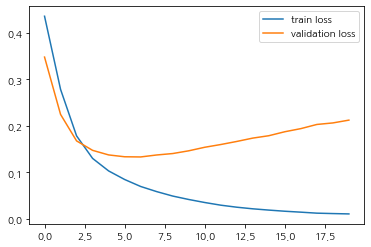

In [222]:
plt.plot(hist.history['loss'], label='train loss')
plt.plot(hist.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

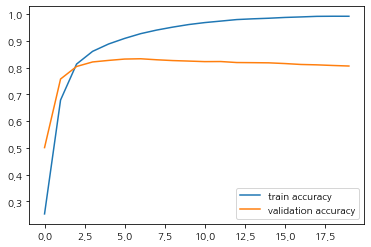

In [223]:
plt.plot(hist.history['acc'], label='train accuracy')
plt.plot(hist.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

In [224]:
pred = model.predict(x_validation)
t= []
for i in range(len(pred)):
    t.append(np.argmax(pred[i]))


with open('./nsmc_test_preprocess.pk', 'rb') as f:
    test=pickle.load(f)

tokenizer = Tokenizer(max_words)
tokenizer.fit_on_texts(test)
test = tokenizer.texts_to_sequences(test)


maxLen = 21
test = tf.keras.preprocessing.sequence.pad_sequences(test, maxlen = maxLen)

pred = model.predict(test)
t= []
for i in range(len(pred)):
    t.append(np.argmax(pred[i]))

test_data = pd.read_csv('/home/lab12/data/test_data.csv')
topic = pd.read_csv('/home/lab12/data/topic_dict.csv')

test_data['topic_idx'] = t
test_data['topic'] = np.where(test_data.topic_idx == 0, 'IT과학',
                             np.where(test_data.topic_idx == 1, '경제',
                                     np.where(test_data.topic_idx == 2, '사회',
                                             np.where(test_data.topic_idx == 3, '생활문화',
                                                     np.where(test_data.topic_idx == 4, '세계',
                                                             np.where(test_data.topic_idx == 5, '스포츠', '정치'))))))

test_data[test_data.topic_idx == 5]

,index,title,topic_idx,topic
1,45655,어버이날 맑다가 흐려져…남부지방 옅은 황사,5,스포츠
6,45660,월드컵 태극전사 16강 전초기지 레오강 입성종합,5,스포츠
14,45668,정상회담 D1 文대통령 취임 후 남북관계 주요 일지,5,스포츠
18,45672,파키스탄 경제난 속 카타르서 30억 달러 투자 유치,5,스포츠
27,45681,미래부 17개 부처별 연구비관리시스템 2개로 통합한다,5,스포츠
...,...,...,...,...
9103,54757,인터파크 인기 유튜버 초청 1인 방송 무료강의,5,스포츠
9109,54763,정경두 9·19 군사합의 적극이행…전작권 전환 차질없이 준비,5,스포츠
9110,54764,IPTV 방송사업 매출 40% 증가 쾌속질주,5,스포츠
9113,54767,KTX 타고 스키장 가자…용평리조트 무료셔틀버스 운영,5,스포츠


In [225]:

test_data[test_data.topic_idx == 2]

,index,title,topic_idx,topic
8,45662,왓츠앱稅 230원에 성난 레바논 민심…총리사퇴로 이어져종합2보,2,사회
9,45663,베트남 경제 고성장 지속…2분기 GDP 6.71% 성장,2,사회
13,45667,황재균 쐐기타…kt 갈 길 바쁜 삼성에 고춧가루,2,사회
16,45670,박원순 시장 아부다비 루브르 박물관 방문,2,사회
23,45677,국내 발간 나노분야 학술지 나노 컨버전스 SCIE 등재,2,사회
...,...,...,...,...
9107,54761,김성태 제천 화재참사 김부겸·조종묵 책임…사퇴하라,2,사회
9112,54766,롯데 임직원 어려운 이웃에 직접 담근 김치 1만5천포기 전달,2,사회
9117,54771,靑 사생활침해 언론폐간 청원에 언론자유 중요…개입 부적절,2,사회
9126,54780,인천 오후 3시35분 대설주의보…눈 3.1cm 쌓여,2,사회


In [208]:
embedding_dim = 100
model = tf.keras.models.Sequential()
model.add( tf.keras.layers.Embedding( max_words, embedding_dim, input_length=maxLen) )
model.add( tf.keras.layers.Flatten() )
model.add( tf.keras.layers.Dropout(0.5) )
model.add( tf.keras.layers.Dense( 32, activation='relu'))
model.add(tf.keras.layers.Dense(7, activation='sigmoid'))

In [209]:
model.compile(
    loss='binary_crossentropy',
    metrics=['acc'],
    optimizer='adam'
)

In [210]:
hist = model.fit( x_train, y_train, epochs=20, batch_size=256, validation_split = 0.2 )

Epoch 1/20
100/100 [==============================] - 1s 9ms/step - loss: 0.5179 - acc: 0.1773 - val_loss: 0.3481 - val_acc: 0.5007
Epoch 2/20
100/100 [==============================] - 1s 8ms/step - loss: 0.3100 - acc: 0.6209 - val_loss: 0.2249 - val_acc: 0.7573
Epoch 3/20
100/100 [==============================] - 1s 8ms/step - loss: 0.1942 - acc: 0.8018 - val_loss: 0.1679 - val_acc: 0.8041
Epoch 4/20
100/100 [==============================] - 1s 8ms/step - loss: 0.1347 - acc: 0.8592 - val_loss: 0.1476 - val_acc: 0.8211
Epoch 5/20
100/100 [==============================] - 1s 8ms/step - loss: 0.1043 - acc: 0.8896 - val_loss: 0.1378 - val_acc: 0.8269
Epoch 6/20
100/100 [==============================] - 1s 8ms/step - loss: 0.0855 - acc: 0.9100 - val_loss: 0.1338 - val_acc: 0.8319
Epoch 7/20
100/100 [==============================] - 1s 8ms/step - loss: 0.0698 - acc: 0.9282 - val_loss: 0.1334 - val_acc: 0.8330
Epoch 8/20
100/100 [==============================] - 1s 8ms/step - loss: 0.

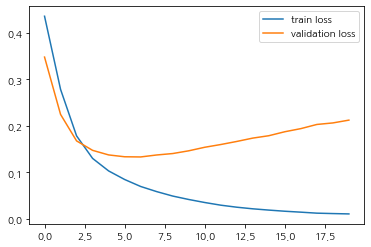

In [211]:
plt.plot(hist.history['loss'], label='train loss')
plt.plot(hist.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

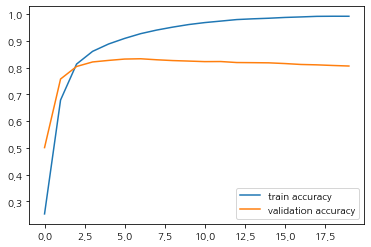

In [212]:
plt.plot(hist.history['acc'], label='train accuracy')
plt.plot(hist.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

In [228]:
embedding_dim = 100
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Embedding(max_words, embedding_dim, input_length=maxLen))
model.add(tf.keras.layers.Conv1D(64, 3, activation='relu'))
model.add(tf.keras.layers.MaxPool1D(3))
model.add( tf.keras.layers.Dropout(0.5) )
model.add(tf.keras.layers.Conv1D(64, 3, activation='relu'))
model.add(tf.keras.layers.GlobalMaxPool1D())
model.add(tf.keras.layers.Dense(7, activation='sigmoid'))

model.compile(
  loss='categorical_crossentropy',
  metrics = ['acc'],
  optimizer = tf.keras.optimizers.RMSprop(lr=0.0001)
)

In [229]:
hist = model.fit( x_train, y_train, epochs=50, batch_size=256, validation_split = 0.2 )

Epoch 1/50
100/100 [==============================] - 1s 10ms/step - loss: 1.9418 - acc: 0.1414 - val_loss: 1.9324 - val_acc: 0.2023
Epoch 2/50
100/100 [==============================] - 1s 8ms/step - loss: 1.9289 - acc: 0.1955 - val_loss: 1.9172 - val_acc: 0.1929
Epoch 3/50
100/100 [==============================] - 1s 8ms/step - loss: 1.9109 - acc: 0.2175 - val_loss: 1.8879 - val_acc: 0.2090
Epoch 4/50
100/100 [==============================] - 1s 8ms/step - loss: 1.8746 - acc: 0.2438 - val_loss: 1.8342 - val_acc: 0.2677
Epoch 5/50
100/100 [==============================] - 1s 8ms/step - loss: 1.8073 - acc: 0.3046 - val_loss: 1.7431 - val_acc: 0.3784
Epoch 6/50
100/100 [==============================] - 1s 8ms/step - loss: 1.7085 - acc: 0.3907 - val_loss: 1.6189 - val_acc: 0.4726
Epoch 7/50
100/100 [==============================] - 1s 8ms/step - loss: 1.5743 - acc: 0.4836 - val_loss: 1.4771 - val_acc: 0.5227
Epoch 8/50
100/100 [==============================] - 1s 8ms/step - loss: 1

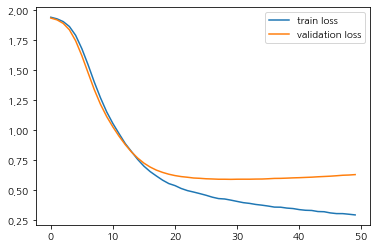

In [230]:
plt.plot(hist.history['loss'], label='train loss')
plt.plot(hist.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

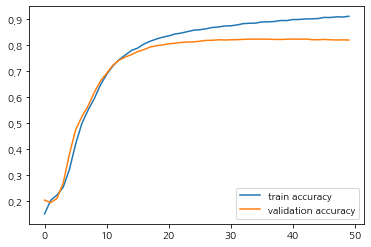

In [231]:
plt.plot(hist.history['acc'], label='train accuracy')
plt.plot(hist.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

In [232]:
pred = model.predict(x_validation)
t= []
for i in range(len(pred)):
    t.append(np.argmax(pred[i]))

In [233]:
with open('./nsmc_test_preprocess.pk', 'rb') as f:
    test=pickle.load(f)

In [234]:
tokenizer = Tokenizer(max_words)
tokenizer.fit_on_texts(test)
test = tokenizer.texts_to_sequences(test)

In [235]:
maxLen = 21
test = tf.keras.preprocessing.sequence.pad_sequences(test, maxlen = maxLen)

In [236]:
pred = model.predict(test)
t= []
for i in range(len(pred)):
    t.append(np.argmax(pred[i]))



In [237]:
test_data = pd.read_csv('/home/lab12/data/test_data.csv')
topic = pd.read_csv('/home/lab12/data/topic_dict.csv')


In [238]:
test_data['topic_idx'] = t
test_data['topic'] = np.where(test_data.topic_idx == 0, 'IT과학',
                             np.where(test_data.topic_idx == 1, '경제',
                                     np.where(test_data.topic_idx == 2, '사회',
                                             np.where(test_data.topic_idx == 3, '생활문화',
                                                     np.where(test_data.topic_idx == 4, '세계',
                                                             np.where(test_data.topic_idx == 5, '스포츠', '정치'))))))


In [243]:
test_data[test_data.topic_idx == 0]

,index,title,topic_idx,topic
22,45676,미 동부 마비시킨 악성 파일 국내서도 발견,0,IT과학
25,45679,예스24 독자들이 선정한 올해의 책 여행의 이유,0,IT과학
37,45691,베네수엘라 대통령 미국과 관계 복원 대화 재개 합의,0,IT과학
47,45701,朴대통령 대통령 단임제로 지속가능한 국정과제 추진 어렵다속보,0,IT과학
52,45706,朴대통령 내주 국회서 일정재개…여야 지도부 환담도 유력,0,IT과학
...,...,...,...,...
9038,54692,게시판 우편진흥원 상공회의소·포브스 대상 2년 연속 수상,0,IT과학
9044,54698,정보보호 위반 통신사·영업점 24곳 과태료 3억4천만원,0,IT과학
9063,54717,게시판 과기정통부 19일 공공SW사업 혁신방안 발표회,0,IT과학
9083,54737,도깨비 책방 찾은 문체부 장관대행,0,IT과학


In [246]:
test_data[:50]

,index,title,topic_idx,topic
0,45654,유튜브 내달 2일까지 크리에이터 지원 공간 운영,4,세계
1,45655,어버이날 맑다가 흐려져…남부지방 옅은 황사,2,사회
2,45656,내년부터 국가RD 평가 때 논문건수는 반영 않는다,4,세계
3,45657,김명자 신임 과총 회장 원로와 젊은 과학자 지혜 모을 것,5,스포츠
4,45658,회색인간 작가 김동식 양심고백 등 새 소설집 2권 출간,2,사회
5,45659,야외서 생방송 하세요…액션캠 전용 요금제 잇따라,4,세계
6,45660,월드컵 태극전사 16강 전초기지 레오강 입성종합,4,세계
7,45661,미세먼지 속 출근길,3,생활문화
8,45662,왓츠앱稅 230원에 성난 레바논 민심…총리사퇴로 이어져종합2보,4,세계
9,45663,베트남 경제 고성장 지속…2분기 GDP 6.71% 성장,6,정치
